In [46]:
import os
import pandas as pd
import torch
import pickle
import re
import numpy as np
## 장르 분류 - 현종 민하
# 현종 - 드라마 코미디 애니 뮤직컬 다큐 공연 액션 멜로 가족 판타지 ( 나머지는 기타로 분류 >> 뒤 이어서 진행)
# 민하 - 스릴러 미스터리 공포 범죄 어드벤처 SF 서부극 사극 전쟁 성인물 기타

['제목', '유형', '구분', '장르', '상영 시간', '등급', '국적', '감독', '시놉시스']

In [47]:
DATA_PATH = 'output.csv'

In [48]:
dataDF = pd.read_csv(DATA_PATH)
dataDF

,0,1,2,3,4,5,6,7,8
0,하얼빈,드라마,일반영화,NaN,NaN,장편,한국,NaN,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨..."
1,괴도 퀸은 서커스를 좋아해,애니메이션,일반영화,58분 55초,12세이상관람가,장편,일본,나기라 겐조,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....
2,혼자 물 빼는 이모 거들어줬다,NaN,일반영화,60분 0초,청소년관람불가,장편,일본,김환,이모와 조카의 정사를 다룬 성애영화
3,위키드,NaN,일반영화,160분 29초,전체관람가,장편,미국,롤랜드 에머리히,/
4,마리우폴에서의 20일,NaN,예술영화,94분 13초,15세이상관람가,장편,미국,윤준세,제96회 미국 아카데미 시상식 장편 다큐멘터리상 수상!영화제 33관왕 & 퓰리처상 ...
...,...,...,...,...,...,...,...,...,...
21461,작별,드라마,예술영화,87분 0초,18세관람가,장편,"아르헨티나, 스페인",루크 그린필드,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...
21462,화월춘야,뮤지컬,일반영화,122분 0초,NaN,장편,홍콩,제라르 꼬르비오,/
21463,비정,드라마,일반영화,104분 0초,NaN,장편,"영국, 프랑스",만다 구니토시,/
21464,출격 명령,전쟁,일반영화,NaN,NaN,장편,한국,안톤 후쿠아,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...


In [49]:
dataDF.replace(np.NAN, '/', inplace = True)
dataDF

,0,1,2,3,4,5,6,7,8
0,하얼빈,드라마,일반영화,/,/,장편,한국,/,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨..."
1,괴도 퀸은 서커스를 좋아해,애니메이션,일반영화,58분 55초,12세이상관람가,장편,일본,나기라 겐조,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....
2,혼자 물 빼는 이모 거들어줬다,/,일반영화,60분 0초,청소년관람불가,장편,일본,김환,이모와 조카의 정사를 다룬 성애영화
3,위키드,/,일반영화,160분 29초,전체관람가,장편,미국,롤랜드 에머리히,/
4,마리우폴에서의 20일,/,예술영화,94분 13초,15세이상관람가,장편,미국,윤준세,제96회 미국 아카데미 시상식 장편 다큐멘터리상 수상!영화제 33관왕 & 퓰리처상 ...
...,...,...,...,...,...,...,...,...,...
21461,작별,드라마,예술영화,87분 0초,18세관람가,장편,"아르헨티나, 스페인",루크 그린필드,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...
21462,화월춘야,뮤지컬,일반영화,122분 0초,/,장편,홍콩,제라르 꼬르비오,/
21463,비정,드라마,일반영화,104분 0초,/,장편,"영국, 프랑스",만다 구니토시,/
21464,출격 명령,전쟁,일반영화,/,/,장편,한국,안톤 후쿠아,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...


In [50]:
dataDF['text'] = dataDF['8'] + ' ' + dataDF['4'] + ' ' + dataDF['6'] + ' ' + dataDF['7']

In [51]:
dataDF

,0,1,2,3,4,5,6,7,8,text
0,하얼빈,드라마,일반영화,/,/,장편,한국,/,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨...","1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨..."
1,괴도 퀸은 서커스를 좋아해,애니메이션,일반영화,58분 55초,12세이상관람가,장편,일본,나기라 겐조,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....
2,혼자 물 빼는 이모 거들어줬다,/,일반영화,60분 0초,청소년관람불가,장편,일본,김환,이모와 조카의 정사를 다룬 성애영화,이모와 조카의 정사를 다룬 성애영화 청소년관람불가 일본 김환
3,위키드,/,일반영화,160분 29초,전체관람가,장편,미국,롤랜드 에머리히,/,/ 전체관람가 미국 롤랜드 에머리히
4,마리우폴에서의 20일,/,예술영화,94분 13초,15세이상관람가,장편,미국,윤준세,제96회 미국 아카데미 시상식 장편 다큐멘터리상 수상!영화제 33관왕 & 퓰리처상 ...,제96회 미국 아카데미 시상식 장편 다큐멘터리상 수상!영화제 33관왕 & 퓰리처상 ...
...,...,...,...,...,...,...,...,...,...,...
21461,작별,드라마,예술영화,87분 0초,18세관람가,장편,"아르헨티나, 스페인",루크 그린필드,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...
21462,화월춘야,뮤지컬,일반영화,122분 0초,/,장편,홍콩,제라르 꼬르비오,/,/ / 홍콩 제라르 꼬르비오
21463,비정,드라마,일반영화,104분 0초,/,장편,"영국, 프랑스",만다 구니토시,/,"/ / 영국, 프랑스 만다 구니토시"
21464,출격 명령,전쟁,일반영화,/,/,장편,한국,안톤 후쿠아,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...


In [52]:
dataDF.drop(dataDF.columns[2:9], axis = 1, inplace = True)

In [53]:
dataDF

,0,1,text
0,하얼빈,드라마,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨..."
1,괴도 퀸은 서커스를 좋아해,애니메이션,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....
2,혼자 물 빼는 이모 거들어줬다,/,이모와 조카의 정사를 다룬 성애영화 청소년관람불가 일본 김환
3,위키드,/,/ 전체관람가 미국 롤랜드 에머리히
4,마리우폴에서의 20일,/,제96회 미국 아카데미 시상식 장편 다큐멘터리상 수상!영화제 33관왕 & 퓰리처상 ...
...,...,...,...
21461,작별,드라마,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...
21462,화월춘야,뮤지컬,/ / 홍콩 제라르 꼬르비오
21463,비정,드라마,"/ / 영국, 프랑스 만다 구니토시"
21464,출격 명령,전쟁,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...


In [54]:
dataDF['1'].value_counts()

1
/           11175
드라마          2693
성인물(에로)      2244
멜로/로맨스       2026
액션            874
애니메이션         558
코미디           480
공포(호러)        348
스릴러           335
기타            230
공연            214
SF             79
사극             55
미스터리           28
범죄             24
전쟁             20
어드벤처           19
판타지            19
서부극(웨스턴)       18
뮤지컬            18
가족              9
Name: count, dtype: int64

In [55]:
# 컬럼 1(장르)에 '/'있는거 drop
dataDF.drop(dataDF[dataDF['1'] == '/'].index, inplace=True)

In [56]:
dataDF['1'].value_counts()

1
드라마         2693
성인물(에로)     2244
멜로/로맨스      2026
액션           874
애니메이션        558
코미디          480
공포(호러)       348
스릴러          335
기타           230
공연           214
SF            79
사극            55
미스터리          28
범죄            24
전쟁            20
어드벤처          19
판타지           19
서부극(웨스턴)      18
뮤지컬           18
가족             9
Name: count, dtype: int64

In [57]:
# '스릴러', '미스터리', '공포', '범죄', '어드벤처', 'SF', '서부극', '사극', '전쟁', '성인물(에로)' >> 기타
dataDF.loc[dataDF['1'].isin(['스릴러', '미스터리', '공포', '범죄', '어드벤처', 'SF', '서부극', '사극', '전쟁', '성인물(에로)']), '1'] = '기타'

In [102]:
dataDF['1'].value_counts()

1
기타          3034
드라마         2693
멜로/로맨스      2026
액션           874
애니메이션        558
코미디          480
공포(호러)       348
공연           214
판타지           19
서부극(웨스턴)      18
뮤지컬           18
가족             9
Name: count, dtype: int64

In [58]:
dataDF

,0,1,text
0,하얼빈,드라마,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨..."
1,괴도 퀸은 서커스를 좋아해,애니메이션,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....
5,하얼빈,드라마,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨..."
6,괴도 퀸은 서커스를 좋아해,애니메이션,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....
21,연소일기,드라마,"""나는 쓸모없는 사람일까?""한 고등학교 교실의 쓰레기통에서 주인 모를 유서 내용의 ..."
...,...,...,...
21461,작별,드라마,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...
21462,화월춘야,뮤지컬,/ / 홍콩 제라르 꼬르비오
21463,비정,드라마,"/ / 영국, 프랑스 만다 구니토시"
21464,출격 명령,기타,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...


In [59]:
dataDF['target'] = dataDF['1']

In [60]:
dataDF

,0,1,text,target
0,하얼빈,드라마,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨...",드라마
1,괴도 퀸은 서커스를 좋아해,애니메이션,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....,애니메이션
5,하얼빈,드라마,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨...",드라마
6,괴도 퀸은 서커스를 좋아해,애니메이션,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....,애니메이션
21,연소일기,드라마,"""나는 쓸모없는 사람일까?""한 고등학교 교실의 쓰레기통에서 주인 모를 유서 내용의 ...",드라마
...,...,...,...,...
21461,작별,드라마,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...,드라마
21462,화월춘야,뮤지컬,/ / 홍콩 제라르 꼬르비오,뮤지컬
21463,비정,드라마,"/ / 영국, 프랑스 만다 구니토시",드라마
21464,출격 명령,기타,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...,기타


In [61]:
dataDF.columns = ['제목','1', 'text','target'] 

In [62]:
dataDF

,제목,1,text,target
0,하얼빈,드라마,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨...",드라마
1,괴도 퀸은 서커스를 좋아해,애니메이션,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....,애니메이션
5,하얼빈,드라마,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨...",드라마
6,괴도 퀸은 서커스를 좋아해,애니메이션,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....,애니메이션
21,연소일기,드라마,"""나는 쓸모없는 사람일까?""한 고등학교 교실의 쓰레기통에서 주인 모를 유서 내용의 ...",드라마
...,...,...,...,...
21461,작별,드라마,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...,드라마
21462,화월춘야,뮤지컬,/ / 홍콩 제라르 꼬르비오,뮤지컬
21463,비정,드라마,"/ / 영국, 프랑스 만다 구니토시",드라마
21464,출격 명령,기타,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...,기타


In [63]:
final_dataDF= dataDF.drop(dataDF.columns[0:2], axis = 1)

In [64]:
final_dataDF

,text,target
0,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨...",드라마
1,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....,애니메이션
5,"1909년, 하나의 목적을 위해 하얼빈으로 향하는 이들과 이를 쫓는 자들 사이의 숨...",드라마
6,괴도에게도 미학이 있다!진부한 도둑질을 거부하는 범죄 세계 유명 인사 '괴도 퀸'....,애니메이션
21,"""나는 쓸모없는 사람일까?""한 고등학교 교실의 쓰레기통에서 주인 모를 유서 내용의 ...",드라마
...,...,...
21461,언니가 남기고 간 편지 이 세상에 보내는 사랑의 작별 인사 한 순간에 교통사고로 부...,드라마
21462,/ / 홍콩 제라르 꼬르비오,뮤지컬
21463,"/ / 영국, 프랑스 만다 구니토시",드라마
21464,공군 파일럿인 이집길과 전택이는 둘다 염매리를 사랑한다. 출격했던 집길은 부상을 당...,기타


In [65]:
train = final_dataDF.sample(frac=0.9, random_state=42)
test= final_dataDF.drop(train.index)

In [66]:
print(train.head(5).to_markdown())

|       | text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [67]:
print('Training Data Size : ', len(train))
print('Testing Data Size : ', len(test))

Training Data Size :  9262
Testing Data Size :  1029


#### 데이터 토큰화 및 단어사전 구축

In [68]:
from konlpy.tag import *
from collections import Counter

In [69]:
stopword_path = 'basic_ko_stopwords.txt'
with open(stopword_path, 'r', encoding='utf-8') as file:
    word = file.readlines()

In [70]:
words = list(map(lambda x:x.replace('\n',''), word))

In [71]:
words

['ㄱ',
 'ㄴ',
 'ㄷ',
 'ㄹ',
 'ㅁ',
 'ㅂ',
 'ㅅ',
 'ㅇ',
 'ㅈ',
 'ㅊ',
 'ㅋ',
 'ㅌ',
 'ㅍ',
 'ㅎ',
 'ㄲ',
 'ㄸ',
 'ㅃ',
 'ㅆ',
 'ㅉ',
 'ㅏ',
 'ㅑ',
 'ㅓ',
 'ㅑ',
 'ㅗ',
 'ㅛ',
 'ㅜ',
 'ㅠ',
 'ㅡ',
 'ㅣ',
 'ㅐ',
 'ㅒ',
 'ㅔ',
 'ㅖ',
 'ㅚ',
 'ㅟ',
 'ㅘ',
 'ㅝ',
 'ㅢ',
 '가',
 '나',
 '다',
 '라',
 '마',
 '바',
 '사',
 '아',
 '자',
 '차',
 '카',
 '타',
 '파',
 '하',
 '까',
 '따',
 '빠',
 '싸',
 '짜',
 '갸',
 '냐',
 '댜',
 '랴',
 '먀',
 '뱌',
 '샤',
 '야',
 '쟈',
 '챠',
 '캬',
 '탸',
 '퍄',
 '햐',
 '꺄',
 '땨',
 '뺘',
 '쌰',
 '쨔',
 '거',
 '너',
 '더',
 '러',
 '머',
 '버',
 '서',
 '어',
 '저',
 '처',
 '커',
 '터',
 '퍼',
 '허',
 '꺼',
 '떠',
 '뻐',
 '써',
 '쩌',
 '겨',
 '녀',
 '뎌',
 '려',
 '며',
 '벼',
 '셔',
 '여',
 '져',
 '쳐',
 '켜',
 '텨',
 '펴',
 '혀',
 '껴',
 '뗘',
 '뼈',
 '쎠',
 '쪄',
 '고',
 '노',
 '도',
 '로',
 '모',
 '보',
 '소',
 '오',
 '조',
 '초',
 '코',
 '토',
 '포',
 '호',
 '꼬',
 '또',
 '뽀',
 '쏘',
 '쪼',
 '교',
 '뇨',
 '됴',
 '료',
 '묘',
 '뵤',
 '쇼',
 '요',
 '죠',
 '쵸',
 '쿄',
 '툐',
 '표',
 '효',
 '꾜',
 '뚀',
 '뾰',
 '쑈',
 '쬬',
 '구',
 '누',
 '두',
 '루',
 '무',
 '부',
 '수',
 '우',
 '주',
 '추',
 '쿠',
 '투',
 '푸',
 '후',
 '꾸'

In [72]:
import re

# 토큰화
def getToken(textlist,tokenizer):
    text_to_token=[]
    for idx,text in enumerate(textlist):
        # 한글빼고 다지우기
        text=re.sub('[^ㄱ-ㅎ가-힣]+',' ',text)

        # 토큰 추출
        tokens=tokenizer.morphs(text,norm=True)
        for token in tokens:
            # stop word 체크
            if token in words:
                tokens.remove(token)
        text_to_token.append(tokens)

    return text_to_token


In [73]:
tokenizer = Okt()
train_tokens = getToken(train.text,tokenizer)
test_tokens = getToken(test.text,tokenizer)

In [74]:
# 토큰 확인
len(train_tokens)

9262

In [75]:
# 단어 사전 구축

def build_vocab(corpus, n_vocab, special_tokens):
    counter = Counter()
    for tokens in corpus:
        counter.update(tokens)
    vocab = special_tokens
    for token, count in counter.most_common(n_vocab):
        vocab.append(token)
    return vocab

In [76]:
vocab = build_vocab(corpus=train_tokens, n_vocab=10000, special_tokens=["<pad>", "<unk>"])
token_to_id ={token: idx for idx, token in enumerate(vocab)}
id_to_token ={idx: token for idx, token in enumerate(vocab)}

In [77]:
file_path = './models/vocab.txt'

with open(file_path, 'w', encoding='utf-8') as file:
    # 리스트의 각 항목을 한 줄씩 파일에 씀
    for word in vocab:
        file.write(word + '\n')  # 각 단어 뒤에 줄바꿈 추가

In [78]:
print(vocab[:10])
print(len(vocab))

['<pad>', '<unk>', '관람', '한다', '된다', '하는', '불가', '의', '청소년', '자신']
10002


In [79]:
unk_id =  token_to_id['<unk>']

train_ids = [
    [token_to_id.get(token, unk_id) for token in review] for review in train_tokens]

test_ids = [
    [token_to_id.get(token, unk_id) for token in review] for review in test_tokens]

In [80]:
train_ids

[[68,
  37,
  1953,
  95,
  287,
  1,
  1,
  9,
  419,
  88,
  535,
  48,
  1,
  1,
  1,
  2884,
  1094,
  1024,
  105,
  269,
  295,
  339,
  120,
  234,
  105,
  9721,
  1,
  48,
  155,
  1484,
  147,
  147,
  963,
  88,
  69,
  54,
  54,
  714,
  295,
  20,
  2776,
  1,
  177,
  1,
  266,
  5474,
  257,
  9,
  7,
  419,
  88,
  7041,
  134,
  54,
  2180,
  269,
  1004,
  1005,
  25,
  7,
  787,
  1,
  48,
  135,
  6644,
  1,
  8,
  2,
  6,
  10,
  687,
  3866],
 [1,
  1263,
  6012,
  9051,
  1,
  196,
  174,
  1,
  7930,
  3867,
  1,
  1,
  937,
  6333,
  1,
  1,
  189,
  237,
  6645,
  1190,
  1,
  61,
  709,
  121,
  3,
  19,
  57,
  1,
  1830,
  86,
  238,
  16,
  134,
  532,
  1499,
  5246,
  1,
  937,
  1276,
  1,
  33,
  474,
  1,
  47,
  18,
  2,
  38,
  2405,
  1606],
 [3758,
  1,
  613,
  1716,
  5064,
  996,
  1,
  2885,
  352,
  6334,
  33,
  35,
  5,
  2263,
  24,
  45,
  3325,
  43,
  1,
  1334,
  306,
  771,
  3986,
  2951,
  100,
  141,
  792,
  133,
  639,
  2181,
  

In [81]:
# train_cnt = 0 
# for cnt in train_ids:
#     maxlen = len(cnt)
#     if train_cnt < maxlen:
#         train_cnt = maxlen

In [82]:
dataLen = list (len(sent) for sent in train_ids )

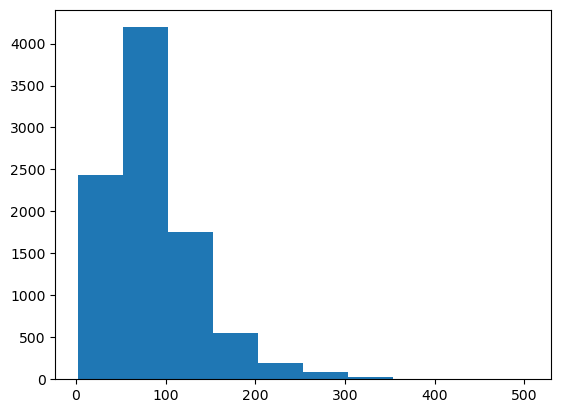

In [83]:
import matplotlib.pyplot as plt
plt.hist(dataLen, bins=10)
plt.show()

In [84]:
import numpy as np

# 패딩
def pad_sequences(sequences, max_length, pad_value):
    result = list()
    for sequence in sequences:
        sequence = sequence[:max_length]
        pad_length = max_length - len(sequence)
        padded_sequence = sequence +[pad_value] * pad_length
        result.append(padded_sequence)
    return np.asarray(result)

In [85]:
max_length = 200
pad_id = token_to_id['<pad>']
train_ids = pad_sequences(train_ids, max_length, pad_id)
test_ids = pad_sequences(test_ids, max_length, pad_id)

In [86]:
print(train_ids[0])
print(test_ids[0])

[  68   37 1953   95  287    1    1    9  419   88  535   48    1    1
    1 2884 1094 1024  105  269  295  339  120  234  105 9721    1   48
  155 1484  147  147  963   88   69   54   54  714  295   20 2776    1
  177    1  266 5474  257    9    7  419   88 7041  134   54 2180  269
 1004 1005   25    7  787    1   48  135 6644    1    8    2    6   10
  687 3866    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [87]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [88]:
train_ids = torch.tensor(train_ids)
test_ids = torch.tensor(test_ids)

In [95]:
print(train.target.head())  # train 데이터의 첫 몇 개 값 확인
print(train.target.dtype)    # 데이터 타입 확인


17250    멜로/로맨스
3275     공포(호러)
12788       코미디
20479       드라마
7151         기타
Name: target, dtype: object
object


In [97]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train.target.values)
test_labels = label_encoder.transform(test.target.values)

train_labels = torch.FloatTensor(train_labels)
test_labels = torch.FloatTensor(test_labels)
## 이건 또 뭔데 ㅋㅋㅋㅋ 아아아아아아아아 낼 함 물어봐

In [99]:
train_dataset = TensorDataset(train_ids, train_labels)
test_dataset = TensorDataset(test_ids, test_labels)

In [100]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

for i,j in train_loader:
    i = i
    j = i
    break

print(i.shape)
print(j.shape)

torch.Size([16, 200])
torch.Size([16, 200])


In [101]:
from torch import optim

In [103]:
import torch.nn as nn

class SentenceClassifier(nn.Module):
    def __init__(self,
                 n_vocab,
                 hidden_dim,
                 embedding_dim,
                 n_layers,
                 n_classes, 
                 dropout = 0.5,
                 bidirectional = True,
                 model_type = 'lstm'):
        super().__init__()

        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim = embedding_dim,
            padding_idx= 0)
        
        if model_type =='rnn':
            self.model = nn.RNN(
                input_size=embedding_dim,
                hidden_size = hidden_dim,
                num_layers= n_layers,
                bidirectional=bidirectional,
                dropout=dropout,
                batch_first=True)
    
        elif model_type == "lstm":
            self.model = nn.LSTM(
                input_size=embedding_dim,
                hidden_size = hidden_dim,
                num_layers= n_layers,
                bidirectional=bidirectional,
                dropout=dropout,
                batch_first=True )
            
        if bidirectional:
            self.classifier = nn.Linear(hidden_dim * 2, n_classes)
            
        else:
            self.classifier = nn.Linear(hidden_dim, n_classes)
            
        self.dropout = nn.Dropout(dropout)

    def forward(self, inputs):
        embeddings =self.embedding(inputs)
        output, _ = self.model(embeddings)
        last_output = output[:, -1, :]
        last_output = self. dropout(last_output)
        logits = self. classifier(last_output)
        return logits

In [109]:
cnt_vocab = len(token_to_id)
hidden_dim = 64
embedding_dim = 128
n_layers =2
n_classes = 12

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
classifier = SentenceClassifier(n_vocab=cnt_vocab, hidden_dim=hidden_dim, embedding_dim=embedding_dim,
                                 n_layers=n_layers, n_classes=n_classes).to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.RMSprop(classifier.parameters(), lr=0.001)

c:\Users\KDP-23\anaconda3\envs\TEXT_018\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [113]:
def train(model, dataset, criterion, optimizer, device, interval):
    model.train()
    losses = list()
    corrects = 0
    total = 0

    for step, (input_ids, labels) in enumerate(dataset):
        input_ids = input_ids.to(device)
        labels = labels.to(device).long()  # Long 타입으로 변환

        logits = model(input_ids)
        loss = criterion(logits, labels)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 정확도 계산
        yhat = torch.argmax(logits, dim=1)  # 다중 클래스 예측
        corrects += torch.eq(yhat, labels).sum().item()  # 정확한 예측 수
        total += labels.size(0)  # 총 배치 수

        if step % interval == 0:
            print(f'Train Loss {step} : {np.mean(losses)}, Train Accuracy: {corrects / total:.4f}')


In [114]:
def test(model, dataset, criterion, device):
    model.eval()
    losses_V = list()
    corrects_V = list()

    for step, (input_ids, labels) in enumerate(dataset):
        input_ids = input_ids.to(device)
        labels = labels.to(device).long()  # Long 타입으로 변환

        logits = model(input_ids)
        loss = criterion(logits, labels)  # 이제 labels는 Long 타입
        losses_V.append(loss.item())

        yhat = torch.argmax(logits, dim=1)  # 다중 클래스 예측
        corrects_V.extend(torch.eq(yhat, labels).cpu().tolist())

    val_loss = np.mean(losses_V)
    val_accuracy = np.mean(corrects_V)

    print(f'Val Loss : {val_loss:.4f}, Val Accuracy : {val_accuracy:.4f}')

    return val_accuracy 

In [ ]:
epochs = 100
interval = 500
BEST_HISTORY = 0

for epoch in range(epochs):
    train(classifier, train_loader, criterion, optimizer, device, interval)
    score = test(classifier, train_loader, criterion, device)

    # 모델 폴더가 없다면 생성
    if not os.path.exists('model/'):
        os.mkdir('model/')
    
    if score is not None and BEST_HISTORY < score:
        BEST_HISTORY = score
        torch.save(classifier, f'model/best_model{epoch}.pth')
                

Train Loss 0 : 1.6901884078979492, Train Accuracy: 0.3750
Train Loss 500 : 1.7932845530157793, Train Accuracy: 0.2909
Val Loss : 1.7655866127557704, Val Accuracy : 0.3108399913625567
Train Loss 0 : 1.5405923128128052, Train Accuracy: 0.4375
Train Loss 500 : 1.7496774072894554, Train Accuracy: 0.3317
Val Loss : 1.549165860153027, Val Accuracy : 0.4334916864608076
Train Loss 0 : 1.1262176036834717, Train Accuracy: 0.7500
Train Loss 500 : 1.5746910381697847, Train Accuracy: 0.4271
Val Loss : 1.6005950280833532, Val Accuracy : 0.4008853379399698
Train Loss 0 : 1.3533592224121094, Train Accuracy: 0.5625
Train Loss 500 : 1.5984656803622217, Train Accuracy: 0.4094
Val Loss : 1.5294060810036403, Val Accuracy : 0.4393219606996329
Train Loss 0 : 1.6957818269729614, Train Accuracy: 0.4375
Train Loss 500 : 1.558386341064514, Train Accuracy: 0.4354
Val Loss : 1.529595169584574, Val Accuracy : 0.4396458648240121
Train Loss 0 : 1.3115875720977783, Train Accuracy: 0.5625
Train Loss 500 : 1.55489088865

In [ ]:
token_to_embedding = dict()
embedding_matrix = classifier.embedding.weight.detach().cpu().numpy()

for word, emb in zip(vocab, embedding_matrix):
    token_to_embedding[word] = emb

token = vocab[1000]
print( token, token_to_embedding[token])

In [ ]:
# fg, axes=plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
# axes[0].plot(range(1, epochs+1), loss_history[0][:6], label='Train')
# axes[0].plot(range(1, epochs+1), loss_history[1][:6], label='Val')
# axes[0].grid()
# axes[0].legend()
# axes[0].set_xlabel("Epoch")
# axes[0].set_ylabel("Loss")
# axes[0].set_title("LOSS")

# axes[1].plot(range(1, 6), score_history[0][:6], label='Train')
# axes[1].plot(range(1, 6), score_history[1][:6], label='Val')
# axes[1].grid()
# axes[1].legend()
# axes[1].set_xlabel("Epoch")
# axes[1].set_ylabel("score")
# axes[1].set_title("score")
# plt.tight_layout()
# plt.show()

-------------------------
#### 학습된 모델로부터 임베딩 추출

In [35]:
from gensim.models import Word2Vec

In [36]:
word2vec= Word2Vec.load('../models/word2vec.model')
init_embeddings = np.zeros((cnt_vocab, embedding_dim))

In [37]:
for index, token in id_to_token.items():
    if token not in ['<pad>','<unk>']:
        if token in word2vec.wv:  # Word2Vec에 토큰이 있는지 확인
            init_embeddings[index] = word2vec.wv[token]
        else:
            # 토큰이 Word2Vec에 없으면 임베딩을 특정 값으로 초기화 (예: 평균값이나 무작위)
            init_embeddings[index] = np.random.normal(size=(embedding_dim,))
            # 또는 zeros로 초기화하여 임베딩 정보를 주지 않음
            # init_embeddings[index] = np.zeros(embedding_dim)


In [38]:
embedding_layer = nn.Embedding.from_pretrained(
    torch.tensor(init_embeddings, dtype=torch.float32)
)

In [39]:
class SentenceClassifier1(nn.Module):
    def __init__(self,
                 n_vocab,
                 hidden_dim,
                 embedding_dim,
                 n_layers, 
                 dropout = 0.5,
                 bidirectional = True,
                 model_type = 'lstm',
                 pretrained_embedding = None):
        
        super().__init__()

        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim = embedding_dim,
            padding_idx= 0)
        
        if model_type =='rnn':
            self.model = nn.RNN(
                input_size=embedding_dim,
                hidden_size = hidden_dim,
                num_layers= n_layers,
                bidirectional=bidirectional,
                dropout=dropout,
                batch_first=True)
    
        elif model_type == "lstm":
            self.model = nn.LSTM(
                input_size=embedding_dim,
                hidden_size = hidden_dim,
                num_layers= n_layers,
                bidirectional=bidirectional,
                dropout=dropout,
                batch_first=True )
            
        if bidirectional:
            self.classifier = nn.Linear(hidden_dim * 2, 1)
            
        else:
            self.classifier = nn.Linear(hidden_dim, 1)
        self.dropout = nn.Dropout(dropout)

        if pretrained_embedding is not None:
            self.embedding = nn.Embedding.from_pretrained(
                torch.tensor(pretrained_embedding, dtype=torch.float32))
        
        
        else :
            self.embedding = nn.Embedding(
                num_embeddings=cnt_vocab,
                embedding_dim=embedding_dim,
                padding_idx= 0)

    def forward(self, inputs):
        embeddings =self.embedding(inputs)
        output, _ = self.model(embeddings)
        last_output = output[:, -1, :]
        last_output = self. dropout(last_output)
        logits = self. classifier(last_output)
        return logits

In [40]:
classifier = SentenceClassifier1(n_vocab=cnt_vocab, hidden_dim=hidden_dim, embedding_dim=embedding_dim, n_layers=n_layers, pretrained_embedding=init_embeddings).to(device)
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = optim.RMSprop(classifier.parameters(), lr=0.001)

In [41]:
epochs= 5
interval = 500
BEST_HISTORY_W = 0

In [ ]:
for epoch in range(epochs):
    train(classifier, train_loader, criterion, optimizer, device, interval)
    score = test(classifier, train_loader, criterion, device)
    
    # 모델 폴더가 없다면 생성
    if not os.path.exists('model/'):
        os.mkdir('model/')

    if BEST_HISTORY_W < max(score):
        BEST_HISTORY_W = max(score)
        torch.save(classifier,f'model/best_model{epoch}.pth')